<a href="https://colab.research.google.com/github/ivynasantino/deeplearning/blob/master/algorithms/activation_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Activation Function

- Linear
- Sigmoid
- Tahn
- ReLU

In [0]:
import math
import matplotlib.pyplot as plt
import numpy as np

import keras
keras.__version__

import warnings
warnings.filterwarnings("ignore")

from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import sgd

arrange_nx = np.arange(-6, 6, 0.1)

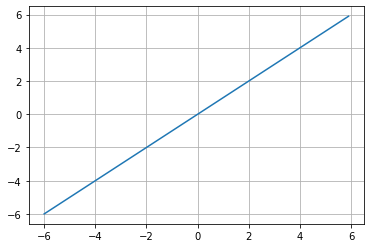

In [4]:
def linear(arrange_nx):
  return [item for item in arrange_nx]

y = linear(arrange_nx)

plt.plot(arrange_nx,y)
plt.grid()
plt.show()

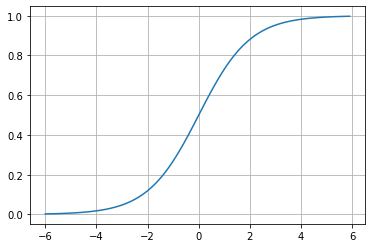

In [5]:
def sigmoid(arrange_nx):
  return [1/(1+math.exp(-item)) for item in arrange_nx]

y = sigmoid(arrange_nx)

plt.plot(arrange_nx,y)
plt.grid()
plt.show()

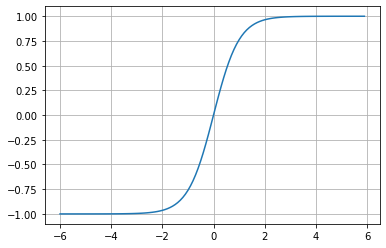

In [6]:
def tanh(arrange_nx, derivative=False):
  tanh_res = np.tanh(arrange_nx)
  if (derivative):
    tanh_res = (1 - (arrange_nx ** 2))

  return tanh_res


y = tanh(arrange_nx)

plt.plot(arrange_nx,y)
plt.grid()
plt.show()

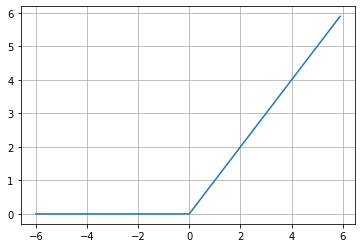

In [8]:
def relu(arrange_nx):
  return [item if item > 0 else 0 for item in arrange_nx]

y = relu(arrange_nx)

plt.plot(arrange_nx,y)
plt.grid()
plt.show()

### Models

In [12]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
x_train = train_images.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

### Linear

In [21]:
model_lin = Sequential()
model_lin.add(Dense(10, activation='linear', input_shape=(784,)))
model_lin.add(Dense(10, activation='softmax'))

model_lin.summary()

model_lin.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
 
epochs = 10
model_lin.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0)

test_loss, test_acc = model_lin.evaluate(x_test, y_test)

print('Model linear - Test loss:', test_loss)
print('Model linear - Test accuracy:', test_acc)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
10000/10000 [==============================] - 0s 25us/step
Model linear - Test loss: 0.3091916818916798
Model linear - Test accuracy: 0.9147


### Sigmoid

In [20]:
warnings.filterwarnings("ignore")

model_sig = Sequential()
model_sig.add(Dense(10, activation='sigmoid', input_shape=(784,)))
model_sig.add(Dense(10, activation='softmax'))

model_sig.summary()

batch_size = 100
num_classes = 10
epochs=5

model_sig.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model_sig.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0)

test_loss, test_acc = model_sig.evaluate(x_test, y_test)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_12 (Dense)             (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
10000/10000 [==============================] - 0s 25us/step
Test loss: 1.2953252769470214
Test accuracy: 0.6769


### Tanh

In [22]:
model_tanh = Sequential()
model_tanh.add(Dense(10, activation='tanh', input_shape=(784,)))
model_tanh.add(Dense(10, activation='softmax'))

model_tanh.summary()

model_tanh.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
 
epochs = 10
model_tanh.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0)

test_loss, test_acc = model_tanh.evaluate(x_test, y_test)

print('Model tanh - Test loss:', test_loss)
print('Model tanh - Test accuracy:', test_acc)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
10000/10000 [==============================] - 0s 30us/step
Model tanh - Test loss: 0.37527457304000855
Model tanh - Test accuracy: 0.903


### ReLU

In [23]:
batch_size = 100
num_classes = 10
epochs=5

model_relu = Sequential()
model_relu.add(Dense(10, activation='relu', input_shape=(784,)))
model_relu.add(Dense(10, activation='softmax'))


model_relu.summary()


model_relu.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model_relu.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0)

test_loss, test_acc = model_relu.evaluate(x_test, y_test)

print('Model relu - Test loss:', test_loss)
print('Model relu - Test accuracy:', test_acc)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_18 (Dense)             (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
10000/10000 [==============================] - 0s 28us/step
Model relu - Test loss: 0.39977824921607974
Model relu - Test accuracy: 0.8873
